In [1]:
import pandas as pd



# Load the CSV data into a DataFrame
df = pd.read_csv("/Users/jackrobertson/UK_votingToday_vs_2017/data/uk_election_data_v2.csv")

# Display the first few rows of the DataFrame to verify it's loaded correctly
print(df.head())


         Constituency    Region      Con      Lab    UKIP      LD      SNP  \
0            Aberavon     Wales   3742.0  15416.0  4971.0  1397.0      NaN   
1           Aberconwy     Wales  12513.0   8514.0  3467.0  1391.0      NaN   
2      Aberdeen North  Scotland   5304.0  11397.0     NaN  2050.0  24793.0   
3      Aberdeen South  Scotland  11087.0  12991.0   897.0  2252.0  20221.0   
4  Airdrie and Shotts  Scotland   3389.0  15108.0  1088.0   678.0  23887.0   

     Grn  DUP      PC  ...  WinningVotes  SecondPlaceVotes  WinningPct  \
0  711.0  NaN  3663.0  ...         15416              4971       48.90   
1  727.0  NaN  3536.0  ...         12513              8514       39.69   
2    NaN  NaN     NaN  ...         24793             11397       56.43   
3  964.0  NaN     NaN  ...         20221             12991       41.65   
4    NaN  NaN     NaN  ...         23887             15108       53.94   

   Majority  MajorityPct  TurnoutPct2015  RemainPct  LeavePct LeaveMajority  \
0     1

In [3]:
# Assuming your DataFrame is named df
print(df.head())  # To look at the first few rows
print(df.info())  # To get a summary of the dataset, including data types and non-null counts


         Constituency    Region      Con      Lab    UKIP      LD      SNP  \
0            Aberavon     Wales   3742.0  15416.0  4971.0  1397.0      NaN   
1           Aberconwy     Wales  12513.0   8514.0  3467.0  1391.0      NaN   
2      Aberdeen North  Scotland   5304.0  11397.0     NaN  2050.0  24793.0   
3      Aberdeen South  Scotland  11087.0  12991.0   897.0  2252.0  20221.0   
4  Airdrie and Shotts  Scotland   3389.0  15108.0  1088.0   678.0  23887.0   

     Grn  DUP      PC  ...  WinningVotes  SecondPlaceVotes  WinningPct  \
0  711.0  NaN  3663.0  ...         15416              4971       48.90   
1  727.0  NaN  3536.0  ...         12513              8514       39.69   
2    NaN  NaN     NaN  ...         24793             11397       56.43   
3  964.0  NaN     NaN  ...         20221             12991       41.65   
4    NaN  NaN     NaN  ...         23887             15108       53.94   

   Majority  MajorityPct  TurnoutPct2015  RemainPct  LeavePct LeaveMajority  \
0     1

In [4]:
# Check for missing values
print(df.isnull().sum())


Constituency          0
Region                0
Con                   3
Lab                  19
UKIP                 26
LD                   19
SNP                 590
Grn                  77
DUP                 634
PC                  610
SF                  632
UUP                 635
SDLP                632
Alliance            632
Ind                 582
Spk                 649
Others              284
ValidVotes            0
WinningParty          0
SecondPlace           0
WinningVotes          0
SecondPlaceVotes      0
WinningPct            0
Majority              0
MajorityPct           0
TurnoutPct2015      129
RemainPct             0
LeavePct              0
LeaveMajority         0
2017_winner           0
dtype: int64


In [5]:
# Example: Fill missing votes with 0
df.fillna({'Con': 0, 'Lab': 0, 'UKIP': 0, 'LD': 0, 'SNP': 0}, inplace=True)


In [6]:
# Example: Drop rows where 'Constituency' or 'Region' is missing
df.dropna(subset=['Constituency', 'Region'], inplace=True)


In [7]:
# Example: Check unique values for 'Region' to find inconsistencies
print(df['Region'].unique())


['Wales' 'Scotland' 'South East England' 'West Midlands'
 'North West England' 'East Midlands' 'London' 'Yorkshire and the Humber'
 'East of England' 'South West England' 'Northern Ireland'
 'North East England']


In [8]:
# Example: Standardize names
df['Region'] = df['Region'].replace({'Wales ': 'Wales'})  # Removing trailing spaces if any


In [9]:
# Assuming you have a list of constituencies
required_constituencies = [...]  # Your list here

# Find missing constituencies
missing_constituencies = set(required_constituencies) - set(df['Constituency'].unique())
print(f"Missing constituencies: {missing_constituencies}")


Missing constituencies: {Ellipsis}


In [10]:
import geopandas as gpd

# Replace 'path_to_shapefile' with the actual path to the .shp file
gdf = gpd.read_file('/Users/jackrobertson/UK_votingToday_vs_2017/data/Local Authority Districts Dec 2023 UK Boundaries/LAD_DEC_2023_UK_BFC.shp')

# Check the loaded GeoDataFrame
print(gdf.head())


     LAD23CD               LAD23NM LAD23NMW   BNG_E   BNG_N     LONG      LAT  \
0  E06000001            Hartlepool     None  447160  531474 -1.27018  54.6761   
1  E06000002         Middlesbrough     None  451141  516887 -1.21099  54.5447   
2  E06000003  Redcar and Cleveland     None  464361  519597 -1.00608  54.5675   
3  E06000004      Stockton-on-Tees     None  444940  518179 -1.30664  54.5569   
4  E06000005            Darlington     None  428029  515648 -1.56835  54.5353   

                               GlobalID  \
0  ed77cf59-0f99-40ee-8ce0-3c495b0436dd   
1  12aebc50-49df-4d0f-af2e-7b18e5928ad7   
2  b073197d-76d1-468b-a1ca-e71a9465fc1e   
3  a722dfde-1ff3-4a0c-90e7-4b7cc413ba49   
4  7341c0fb-23f7-4180-9f8f-f11c67107389   

                                            geometry  
0  MULTIPOLYGON (((450154.599 525938.201, 450140....  
1  MULTIPOLYGON (((446854.700 517192.700, 446854....  
2  MULTIPOLYGON (((451747.397 520561.100, 451792....  
3  MULTIPOLYGON (((447177.704 5178

In [14]:
# Drop unnecessary columns
gdf_cleaned = gdf.drop(['LAD23CD', 'LAD23NMW'], axis=1)
print(gdf_cleaned.head())



                LAD23NM   BNG_E   BNG_N     LONG      LAT  \
0            Hartlepool  447160  531474 -1.27018  54.6761   
1         Middlesbrough  451141  516887 -1.21099  54.5447   
2  Redcar and Cleveland  464361  519597 -1.00608  54.5675   
3      Stockton-on-Tees  444940  518179 -1.30664  54.5569   
4            Darlington  428029  515648 -1.56835  54.5353   

                               GlobalID  \
0  ed77cf59-0f99-40ee-8ce0-3c495b0436dd   
1  12aebc50-49df-4d0f-af2e-7b18e5928ad7   
2  b073197d-76d1-468b-a1ca-e71a9465fc1e   
3  a722dfde-1ff3-4a0c-90e7-4b7cc413ba49   
4  7341c0fb-23f7-4180-9f8f-f11c67107389   

                                            geometry  
0  MULTIPOLYGON (((450154.599 525938.201, 450140....  
1  MULTIPOLYGON (((446854.700 517192.700, 446854....  
2  MULTIPOLYGON (((451747.397 520561.100, 451792....  
3  MULTIPOLYGON (((447177.704 517811.797, 447176....  
4  POLYGON ((423496.602 524724.299, 423497.204 52...  


In [16]:
# Merge the cleaned GeoDataFrame with your voting data DataFrame
# Make sure 'Constituency' in df matches 'LAD23NM' in gdf_cleaned
merged_gdf = gdf_cleaned.merge(df, left_on='LAD23NM', right_on='Constituency')
# Check the first few rows of the merged GeoDataFrame
print(merged_gdf.head())



          LAD23NM   BNG_E   BNG_N     LONG      LAT  \
0      Hartlepool  447160  531474 -1.27018  54.6761   
1   Middlesbrough  451141  516887 -1.21099  54.5447   
2      Darlington  428029  515648 -1.56835  54.5353   
3          Halton  354246  382146 -2.68853  53.3342   
4  North Somerset  347614  166718 -2.75438  51.3971   

                               GlobalID  \
0  ed77cf59-0f99-40ee-8ce0-3c495b0436dd   
1  12aebc50-49df-4d0f-af2e-7b18e5928ad7   
2  7341c0fb-23f7-4180-9f8f-f11c67107389   
3  fbd4f0f4-0d8c-4f38-8abf-6804e84c4ace   
4  5fbbbf1a-bb0d-464a-b2ce-c088e5f2bf50   

                                            geometry    Constituency  \
0  MULTIPOLYGON (((450154.599 525938.201, 450140....      Hartlepool   
1  MULTIPOLYGON (((446854.700 517192.700, 446854....   Middlesbrough   
2  POLYGON ((423496.602 524724.299, 423497.204 52...      Darlington   
3  MULTIPOLYGON (((358374.702 384376.803, 358367....          Halton   
4  MULTIPOLYGON (((323057.997 160841.499, 323061..

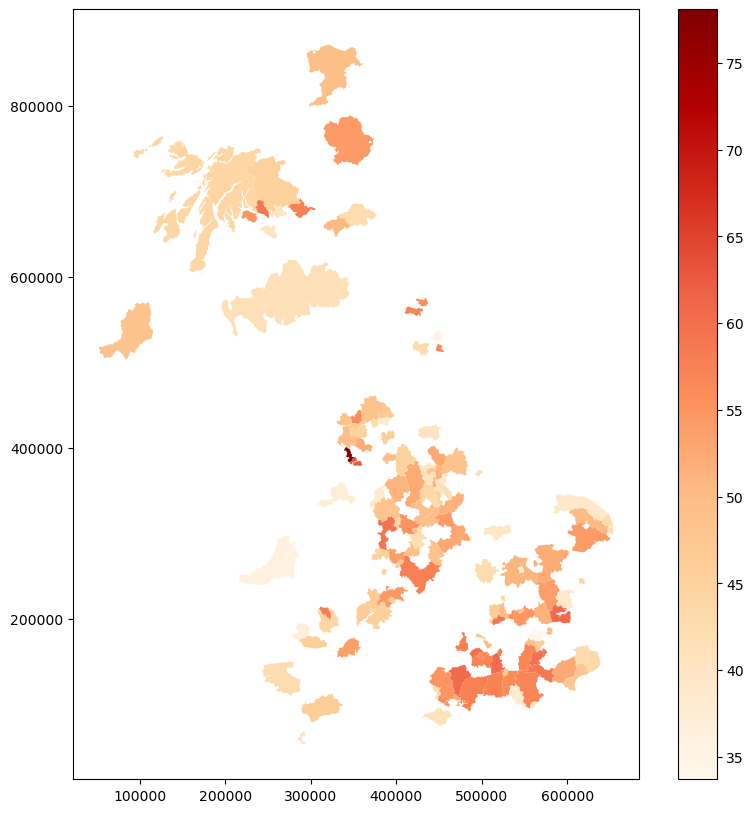

In [17]:
import matplotlib.pyplot as plt

# Example: Visualize based on a specific column, e.g., 'WinningPct'
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_gdf.plot(column='WinningPct', ax=ax, legend=True, cmap='OrRd')
plt.show()


In [33]:
from shapely.geometry import Polygon

# Create a single polygon representing the outer boundary of the UK
uk_outline = merged_gdf.unary_union.convex_hull


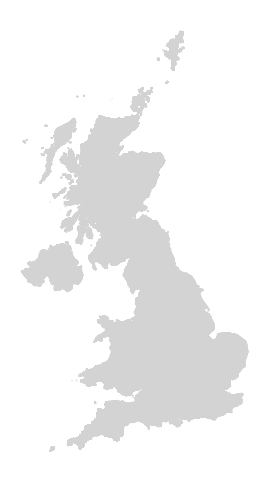

In [37]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming you've already loaded the shapefile into 'gdf', but if not, here's how:
gdf = gpd.read_file('/Users/jackrobertson/UK_votingToday_vs_2017/data/Local Authority Districts Dec 2023 UK Boundaries/LAD_DEC_2023_UK_BFC.shp')

fig, ax = plt.subplots(1, figsize=(10, 6))

# Plot the shapefile
gdf.plot(ax=ax, edgecolor='lightgrey', facecolor='lightgrey')

# Optionally, remove the axes for a cleaner look
ax.set_axis_off()

plt.show()


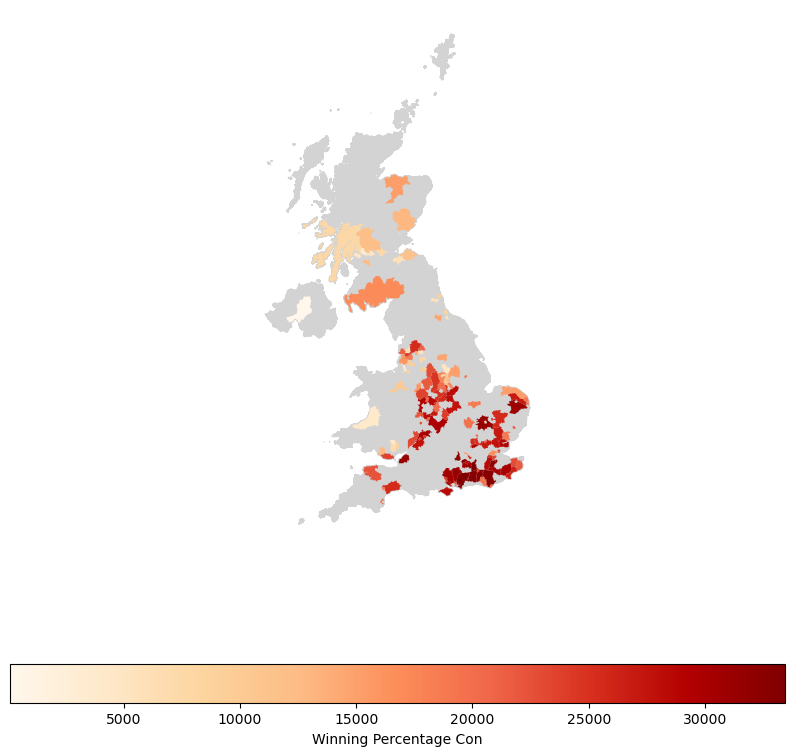

In [41]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the original shapefile as a base map
gdf = gpd.read_file('/Users/jackrobertson/UK_votingToday_vs_2017/data/Local Authority Districts Dec 2023 UK Boundaries/LAD_DEC_2023_UK_BFC.shp')

# Assuming merged_gdf is already prepared with 'WinningPct' column
# Prepare the figure and axes
fig, ax = plt.subplots(1, figsize=(10, 10))

# Plot the base map
gdf.plot(ax=ax, edgecolor='lightgrey', facecolor='lightgrey')

# Overlay the 'WinningPct' visualization on top
merged_gdf.plot(column='Con', ax=ax, legend=True, cmap='OrRd', legend_kwds={'label': "Winning Percentage Con", 'orientation': "horizontal"})

# Optionally, remove the axes for a cleaner look
ax.set_axis_off()

plt.show()


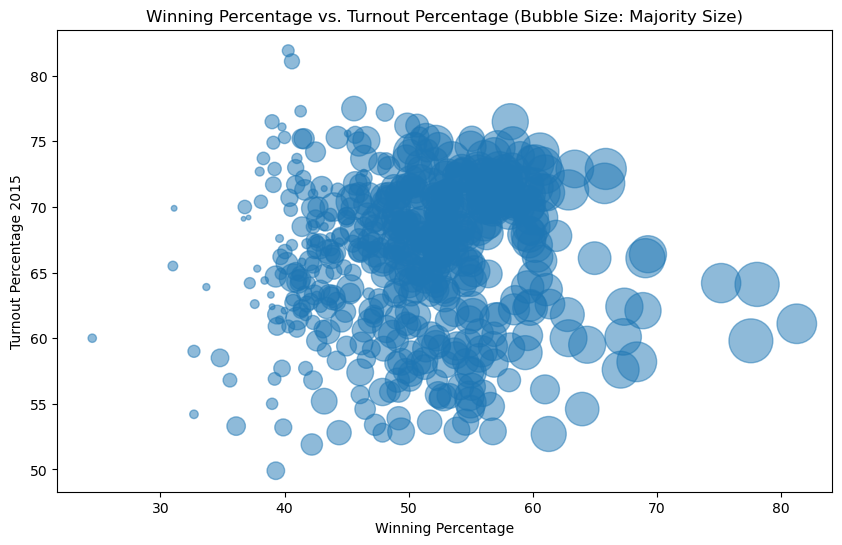

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame containing the constituency data

# Convert columns to numeric if they're not already, handling missing values as needed
df['WinningPct'] = pd.to_numeric(df['WinningPct'], errors='coerce')
df['TurnoutPct2015'] = pd.to_numeric(df['TurnoutPct2015'], errors='coerce')
df['Majority'] = pd.to_numeric(df['Majority'], errors='coerce')

# Remove any rows with missing data for simplicity
df_clean = df.dropna(subset=['WinningPct', 'TurnoutPct2015', 'Majority'])

# Plot
plt.figure(figsize=(10, 6))

# The bubble size ('s' parameter) needs to be scaled. You might need to adjust the scaling factor.
# Adding 10 to Majority to avoid having zero-sized bubbles for very small majorities.
bubble_size = df_clean['Majority'] / df_clean['Majority'].max() * 1000 + 10

plt.scatter(df_clean['WinningPct'], df_clean['TurnoutPct2015'], s=bubble_size, alpha=0.5)
plt.xlabel('Winning Percentage')
plt.ylabel('Turnout Percentage 2015')
plt.title('Winning Percentage vs. Turnout Percentage (Bubble Size: Majority Size)')

plt.show()


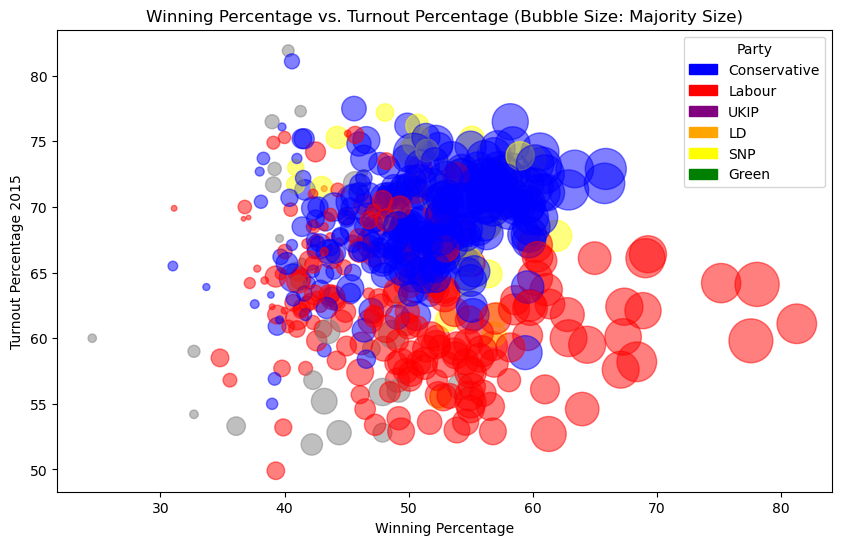

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Patch

# Define party colors with a fallback color for unmapped values
party_colors = {
    'Conservative': 'blue',
    'Labour': 'red',
    'UKIP': 'purple',
    'LD': 'orange',
    'SNP': 'yellow',
    'Green': 'green',
    # Add more parties and their colors as needed
}

# Ensure df_clean is a DataFrame and not a view/slice of another DataFrame
# Map the winning party to its corresponding color, using 'gray' for any unmapped parties
df_clean.loc[:, 'color'] = df_clean['2017_winner'].map(party_colors).fillna('gray')

# Plot
plt.figure(figsize=(10, 6))

# Scale the bubble size and ensure it's properly adjusted for the dataset
bubble_size = df_clean['Majority'] / df_clean['Majority'].max() * 1000 + 10

# Scatter plot with color mapping
plt.scatter(df_clean['WinningPct'], df_clean['TurnoutPct2015'], s=bubble_size, c=df_clean['color'], alpha=0.5)
plt.xlabel('Winning Percentage')
plt.ylabel('Turnout Percentage 2015')
plt.title('Winning Percentage vs. Turnout Percentage (Bubble Size: Majority Size)')

# Create a legend for the colors
legend_elements = [Patch(facecolor=color, edgecolor=color, label=party) for party, color in party_colors.items()]
plt.legend(handles=legend_elements, title="Party")

plt.show()


In [48]:
df_clean


,Constituency,Region,Con,Lab,UKIP,LD,SNP,Grn,DUP,PC,...,SecondPlaceVotes,WinningPct,Majority,MajorityPct,TurnoutPct2015,RemainPct,LeavePct,LeaveMajority,2017_winner,color
0,Aberavon,Wales,3742.0,15416.0,4971.0,1397.0,0.0,711.0,NaN,3663.0,...,4971,48.90,10445,33.13,63.3,40.1,59.9,19.8,Labour,red
1,Aberconwy,Wales,12513.0,8514.0,3467.0,1391.0,0.0,727.0,NaN,3536.0,...,8514,39.69,3999,13.26,66.2,46.7,53.3,6.6,Conservative,blue
2,Aberdeen North,Scotland,5304.0,11397.0,0.0,2050.0,24793.0,NaN,NaN,NaN,...,11397,56.43,13396,30.49,64.9,57.0,43.0,-14.0,SNP,yellow
3,Aberdeen South,Scotland,11087.0,12991.0,897.0,2252.0,20221.0,964.0,NaN,NaN,...,12991,41.65,7230,14.89,71.3,67.7,32.3,-35.4,Conservative,blue
4,Airdrie and Shotts,Scotland,3389.0,15108.0,1088.0,678.0,23887.0,NaN,NaN,NaN,...,15108,53.94,8779,19.82,66.4,60.0,40.0,-20.0,SNP,yellow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,Wythenshawe and Sale East,North West England,11124.0,21693.0,6354.0,1927.0,0.0,1658.0,NaN,NaN,...,11124,50.10,10569,24.43,56.9,50.2,49.8,-0.4,Labour,red
646,Yeovil,South West England,24178.0,4053.0,7646.0,18865.0,0.0,2191.0,NaN,NaN,...,18865,42.50,5313,9.33,69.1,40.8,59.2,18.4,Conservative,blue
647,Ynys Mon,Wales,7393.0,10871.0,5121.0,751.0,0.0,NaN,NaN,10642.0,...,10642,31.10,229,0.66,69.9,49.1,50.9,1.8,Labour,red
648,York Central,Yorkshire and the Humber,13496.0,20212.0,4795.0,3804.0,0.0,4791.0,NaN,NaN,...,13496,42.40,6716,14.09,63.3,61.5,38.5,-23.0,Labour,red
